## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.85,0.9,0.95]
NESTEROV = ['TRUE','FALSE']

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for mo in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %f , NESTEROV=%s" % (mo,nesterov))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=mo)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "momentum: %f nesterov: %s" % (mo,nesterov)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.850000 , NESTEROV=TRUE
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.2934 - acc: 0.1273 - val_loss: 2.2607 - val_acc: 0.1465
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.2415 - acc: 0.1674 - val_loss: 2.2250 - val_acc: 0.1773
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2068 - acc: 0.1966 - val_loss: 2.1908 - val_acc: 0.2042
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.1723 - acc: 0.2185 - val_loss: 2.1577 - val_acc: 0.2272
Epoch 5/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.1408 - acc: 0.2367 - val_loss: 2.1273 - val_acc: 0.2446
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.1107 - acc: 0.2513 - val_loss: 2.0986 - val_acc: 0.2542
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.0830 - acc: 0.2602 - val_loss: 2.0730 - val_acc

50000/50000 [==============================] - 3s 68us/step - loss: 2.1969 - acc: 0.2104 - val_loss: 2.1635 - val_acc: 0.2238
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.1345 - acc: 0.2390 - val_loss: 2.1098 - val_acc: 0.2507
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.0860 - acc: 0.2627 - val_loss: 2.0665 - val_acc: 0.2648
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.0443 - acc: 0.2770 - val_loss: 2.0290 - val_acc: 0.2800
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.0104 - acc: 0.2887 - val_loss: 1.9990 - val_acc: 0.2906
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9828 - acc: 0.2994 - val_loss: 1.9740 - val_acc: 0.2985
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9592 - acc: 0.3079 - val_loss: 1.9536 - val_acc: 0.3034
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 69us/step - loss: 2.1411 - acc: 0.2560 - val_loss: 2.1141 - val_acc: 0.2716
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.0949 - acc: 0.2738 - val_loss: 2.0722 - val_acc: 0.2837
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.0557 - acc: 0.2858 - val_loss: 2.0347 - val_acc: 0.3047
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.0221 - acc: 0.2977 - val_loss: 2.0046 - val_acc: 0.3076
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.9946 - acc: 0.3075 - val_loss: 1.9796 - val_acc: 0.3182
Epoch 8/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.9715 - acc: 0.3145 - val_loss: 1.9590 - val_acc: 0.3256
Epoch 9/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9519 - acc: 0.3210 - val_loss: 1.9423 - val_acc: 0.3284
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 66us/step - loss: 1.9956 - acc: 0.3101 - val_loss: 1.9696 - val_acc: 0.3178
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9482 - acc: 0.3233 - val_loss: 1.9304 - val_acc: 0.3286
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.9136 - acc: 0.3335 - val_loss: 1.8995 - val_acc: 0.3398
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8860 - acc: 0.3413 - val_loss: 1.8754 - val_acc: 0.3435
Epoch 8/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8629 - acc: 0.3483 - val_loss: 1.8543 - val_acc: 0.3567
Epoch 9/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8431 - acc: 0.3568 - val_loss: 1.8382 - val_acc: 0.3576
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8266 - acc: 0.3623 - val_loss: 1.8214 - val_acc: 0.3666
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 64us/step - loss: 1.9355 - acc: 0.3291 - val_loss: 1.9233 - val_acc: 0.3325
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9047 - acc: 0.3397 - val_loss: 1.8973 - val_acc: 0.3432
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8800 - acc: 0.3477 - val_loss: 1.8743 - val_acc: 0.3522
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8581 - acc: 0.3571 - val_loss: 1.8556 - val_acc: 0.3550
Epoch 9/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8395 - acc: 0.3628 - val_loss: 1.8366 - val_acc: 0.3655
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8223 - acc: 0.3679 - val_loss: 1.8198 - val_acc: 0.3663
Epoch 11/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8067 - acc: 0.3736 - val_loss: 1.8057 - val_acc: 0.3727
Epoch 12/50
50000/50000 [=========================

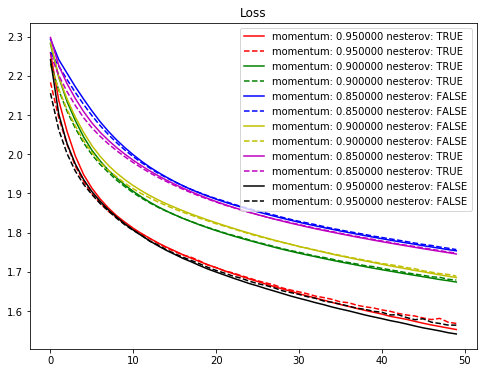

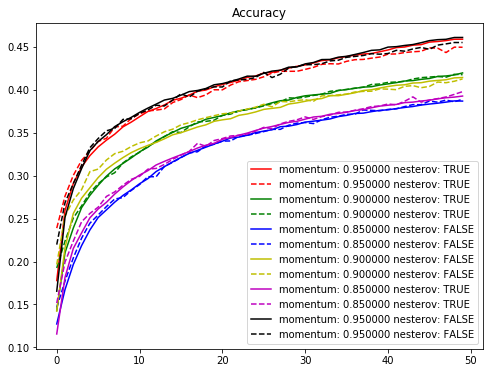

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
